# Find, Access, Reuse Seatizen data with Web Services:

This script provides examples of standard ways to read metadata, get data and map these data. R Script generated by OpenFairViewer (https://github.com/eblondel/OpenFairViewer) has been reused for data discovery and acess and extended with leaflet for maps and plots.

In this notebook, we will use different software components which provide different kind of services: 
 - Discovery service: find data with Geonetowrk Metadata Catalogue (OGC CSW standardized Web Service for metadata) URL: https://geonetwork-sdi-lab.d4science.org/geonetwork
 - Access service: data are made available with Geoserver Spatial data server(OGC WMS and WFS standardized Web Services to Map or Access data) URL: https://geoserver-sdi-lab.d4science.org/geoserver 
 - Display service: the data can also be found, accessed and displayed online with OpenFairViewer GUIs, URL: https://sdi-lab.d4science.org/sdi-lab/


## 0. Configuration: we first need to load required packages

In [33]:
#If needed the packages have to be installed first...
if(!require(geoflow)){
    install.packages("remotes")
    remotes::install_github("eblondel/geoflow")
    require(geoflow)
}
if(!require(ows4R)){
	install.packages("ows4R")
	require(ows4R)
}
if(!require(geometa)){
	install.packages("geometa")
	require(geometa)
}
if(!require(sp)){
	install.packages("sp")
	require(sp)
}
if(!require(sf)){
	install.packages("sf")
	require(sf)
}
if(!require(units)){
	install.packages("units")
	require(units)
}
if(!require(geojsonio)){
    install.packages("remotes")
    remotes::install_github("ropensci/geojsonio")
    require(geojsonio)
}
if(!require(dplyr)){
	install.packages("dplyr")
	require(dplyr)
}
if(!require(leaflet)){
	install.packages("leaflet")
	require(leaflet)
}

## 1. Find data by querying the Web Service (OGC CSW) provided bt Geonetwork metadata catalogue

### In this notebook we will look for a dataset called "view_occurences_manual_annotation"

In OGC standards datasets are named "Feature Type" (ie datasets / shapefiles)

In [27]:
#Dataset Identifier
layer <- "view_occurences_manual_annotation"

In [28]:
#Define what catalog will be queried by providing the URL of the Web Service
CSW <- CSWClient$new(
	url = "https://geonetwork-sdi-lab.d4science.org/geonetwork/srv/eng/csw",
	serviceVersion = "2.0.2",
	logger = "INFO"
)
#Get metadata for dataset 'view_occurences_manual_annotation'
md <- CSW$getRecordById(layer, outputSchema = "http://www.isotc211.org/2005/gmd")
fc <- CSW$getRecordById(paste0(layer,"_dsd"), outputSchema = "http://www.isotc211.org/2005/gfc")
# Display the discovery metadata of the dataset
md
# Display the usage metadata (data structure) of the dataset
fc

[ows4R][INFO] OWSGetCapabilities - Fetching https://geonetwork-sdi-lab.d4science.org/geonetwork/srv/eng/csw?service=CSW&version=2.0.2&request=GetCapabilities 
[ows4R][INFO] CSWClient - Fetching record 'view_occurences_manual_annotation' ... 
[ows4R][INFO] CSWClient - Fetching record 'view_occurences_manual_annotation_dsd' ... 


<ISOMetadata>
....|-- fileIdentifier: view_occurences_manual_annotation
....|-- language <ISOLanguage>: eng {English}
........|-- value: English
....|-- characterSet <ISOCharacterSet>: utf8 {8-bit variable size UCS Transfer Format, based on ISO/IEC 10646}
........|-- value: utf8
....|-- hierarchyLevel <ISOHierarchyLevel>: dataset {information applies to the dataset}
........|-- value: dataset: dataset {information applies to the dataset}
....|-- dateStamp: 2021-02-08T15:17:04
....|-- metadataStandardName: ISO 19115:2003/19139
....|-- metadataStandardVersion: 1.0
....|-- dataSetURI: view_occurences_manual_annotation
....|-- spatialRepresentationInfo <ISOVectorSpatialRepresentation>
........|-- topologyLevel <ISOTopologyLevel>: geometryOnly {geometry objects without any additional structure which describes topology}
............|-- value: geometryOnly
........|-- geometricObjects <ISOGeometricObjects>
............|-- geometricObjectType <ISOGeometricObjectType>: point {zero-dimensional g

<ISOFeatureCatalogue>
....|-- name: Spatial distribution of species annotated on underwater pictures - Feature Catalogue
....|-- scope: geoflow:dbquery
....|-- scope: openfairviewer:ogc_filters
....|-- fieldOfApplication: Open Science
....|-- fieldOfApplication: FAIR
....|-- versionNumber: 20210208T151708
....|-- versionDate: 2021-02-08T15:17:34
....|-- producer <ISOResponsibleParty>
........|-- individualName: Emmanuel Blondel
........|-- organisationName: Independent
........|-- positionName: Engineer
........|-- contactInfo <ISOContact>
............|-- phone <ISOTelephone>
................|-- voice[gco:nilReason=missing]
................|-- facsimile[gco:nilReason=missing]
............|-- address <ISOAddress>
................|-- deliveryPoint[gco:nilReason=missing]
................|-- city[gco:nilReason=missing]
................|-- postalCode[gco:nilReason=missing]
................|-- country: France
................|-- electronicMailAddress: emmanuel.blondel1@gmail.com
............

## 2. Access data by connecting the Web Service (OGC WFS) provided by Geoserver

### 2.1 Define parameters of the Web Service (OGC WFS) provided by Geoserver and access data

In [29]:
WFS <- WFSClient$new(
	url = "https://geoserver-sdi-lab.d4science.org/geoserver/Reef_database/ows",
	serviceVersion = "1.0.0",
	logger = "INFO"
)
#Get feature type for dataset 'session_2017_11_19_paddle_Black_Rocks' (layer = 'session_2017_11_19_paddle_Black_Rocks' )
ft <- WFS$capabilities$findFeatureTypeByName(layer)
#Get data features for dataset 'session_2017_11_19_paddle_Black_Rocks' (layer = 'session_2017_11_19_paddle_Black_Rocks' )
data.sf <- ft$getFeatures(maxfeatures=100)
data.sp <- as(data.sf, "Spatial")
#head(data.sf)
cat("Here are the column names of the file \n")
colnames(data.sf)
#head(data.sp)
cat("Here is a sample of the file \n")
head(data.sf)
data=data.sf

[ows4R][INFO] OWSGetCapabilities - Fetching https://geoserver-sdi-lab.d4science.org/geoserver/Reef_database/ows?service=WFS&version=1.0.0&request=GetCapabilities 
[ows4R][INFO] WFSGetFeature - Fetching https://geoserver-sdi-lab.d4science.org/geoserver/Reef_database/ows?service=WFS&version=1.0.0&typeName=Reef_database:view_occurences_manual_annotation&maxfeatures=100&request=GetFeature 
[ows4R][INFO] WFSDescribeFeatureType - Fetching https://geoserver-sdi-lab.d4science.org/geoserver/Reef_database/ows?service=WFS&version=1.0.0&typeName=Reef_database:view_occurences_manual_annotation&request=DescribeFeatureType 
Here are the column names of the file 


[1] "gml_id"           "line_number"      "id"               "file_name"       
 [5] "relative_path"    "species_name"     "time"             "gps_time"        
 [9] "decimalLatitude"  "decimalLongitude" "LightValue"       "Make"            
[13] "Model"            "ThumbnailImage"   "geometry_postgis"

Here is a sample of the file 


gml_id                                                          line_number
1 view_occurences_manual_annotation.fid-19eeaaa1_177a9f6b22d_70b4 7715       
2 view_occurences_manual_annotation.fid-19eeaaa1_177a9f6b22d_70b5 7714       
3 view_occurences_manual_annotation.fid-19eeaaa1_177a9f6b22d_70b6 6830       
4 view_occurences_manual_annotation.fid-19eeaaa1_177a9f6b22d_70b7 6829       
5 view_occurences_manual_annotation.fid-19eeaaa1_177a9f6b22d_70b8 6828       
6 view_occurences_manual_annotation.fid-19eeaaa1_177a9f6b22d_70b9 6827       
  id  file_name                                    
1 526 session_2017_11_04_kite_Le_Morne_G0191859.JPG
2 527 session_2017_11_04_kite_Le_Morne_G0191860.JPG
3 609 session_2017_11_04_kite_Le_Morne_G0191942.JPG
4 610 session_2017_11_04_kite_Le_Morne_G0191943.JPG
5 611 session_2017_11_04_kite_Le_Morne_G0191944.JPG
6 618 session_2017_11_04_kite_Le_Morne_G0191951.JPG
  relative_path                                               
1 /session_2017_11_04_kite_Le_Morne/DCIM/101GOPRO/G0191859.JPG
2 /session_2017_11_04_kite_Le_Morne/DCIM/101GOPRO/G0191860.JPG
3 /session_2017_11_04_kite_Le_Morne/DCIM/101GOPRO/G0191942.JPG
4 /session_2017_11_04_kite_Le_Morne/DCIM/101GOPRO/G0191943.JPG
5 /session_2017_11_04_kite_Le_Morne/DCIM/101GOPRO/G0191944.JPG
6 /session_2017_11_04_kite_Le_Morne/DCIM/101GOPRO/G0191951.JPG
  species_name             time                gps_time           
1 Millepora                2015-01-01 14:20:01 2017-11-04 16:02:44
2 Millepora                2015-01-01 14:20:01 2017-11-04 16:02:44
3 Thalassodendron ciliatum 2015-01-01 14:20:56 2017-11-04 16:03:39
4 Thalassodendron ciliatum 2015-01-01 14:20:57 2017-11-04 16:03:40
5 Thalassodendron ciliatum 2015-01-01 14:20:57 2017-11-04 16:03:40
6 Thalassodendron ciliatum 2015-01-01 14:21:02 2017-11-04 16:03:45
  decimalLatitude decimalLongitude LightValue Make  Model        
1 -20.47108       57.31799         11.67420   GoPro HERO5 Session
2 -20.47108       57.31799         11.67420   GoPro HERO5 Session
3 -20.47408       57.31598         12.48668   GoPro HERO5 Session
4 -20.47413       57.31593         12.12764   GoPro HERO5 Session
5 -20.47413       57.31593         12.08864   GoPro HERO5 Session
6 -20.47432       57.31583         12.54928   GoPro HERO5 Session
  ThumbnailImage                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

### 2.2 Plot data

Here is a plot of the file content


`summarise()` ungrouping output (override with `.groups` argument)



species_name,count,geometry_postgis
<chr>,<int>,<GEOMETRY>
banc,3,MULTIPOINT ((57.30688 -20.4...
casier,2,MULTIPOINT ((57.32215 -20.4...
fish,19,MULTIPOINT ((57.30472 -20.4...
Holoturian,6,MULTIPOINT ((57.3182 -20.46...
Millepora,12,MULTIPOINT ((57.31388 -20.4...
oursin,3,MULTIPOINT ((57.30641 -20.4...
patate,5,MULTIPOINT ((57.30686 -20.4...
picasso,1,POINT (57.31002 -20.47738)
ray,2,MULTIPOINT ((57.31019 -20.4...


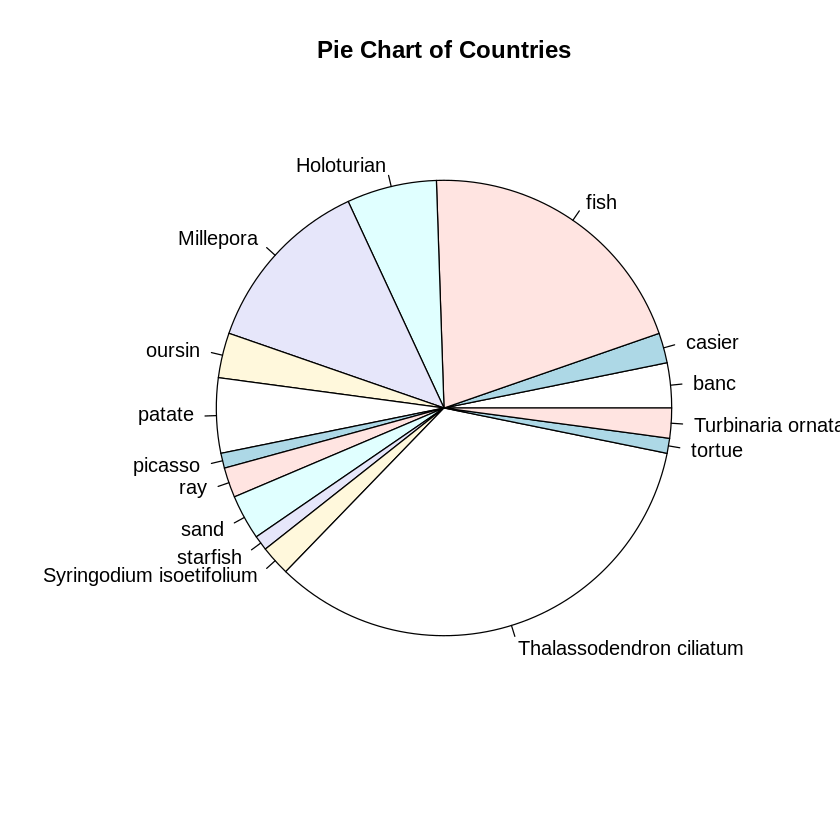

In [30]:
cat("Here is a plot of the file content\n")
my_pie <- data %>% group_by(species_name) %>% summarise(count = n_distinct(id))
my_pie
pie(my_pie$count, labels = my_pie$species_name, main="Pie Chart of Countries")

## 3. Display the data of the layer in leaflet

code taken from https://rstudio.github.io/leaflet/ 

#### 3.1 A first map with Leaflet to display the sample the data collected with WFS Web Service

In [31]:
library(leaflet)
leaflet(data = data.sp,height=1000, width=1000,options = leafletOptions(minZoom = 3, maxZoom = 18)) %>% addTiles() %>%
  addMarkers(~decimalLongitude, ~decimalLatitude, popup = ~as.character(species_name), label = ~as.character(species_name))

HTML widgets cannot be represented in plain text (need html)

#### 3.2 A second map with Leaflet to display both the sample of data collected with WFS Web Service, all data with WMS OGC Web Service and extra layers to make it pretty

WMS is another kind of Web Service that displays data on a Map but doesn't convey the data (just an image that can be mapped)

In [32]:
#data_json <- ft$getFeatures(maxfeatures=100,outputformat="json")
#data.sp <- as(data_json, "Spatial")

library(leaflet)
leaflet(data = data.sp,options = leafletOptions(minZoom = 3, maxZoom = 18)
        ) %>% addTiles() %>%
  addMarkers(~decimalLongitude, ~decimalLatitude, popup = ~as.character(species_name), label = ~as.character(species_name)
        ) %>% setView(lng = 57.31788, lat =-20.47127, zoom = 15
        ) %>% addProviderTiles(providers$Esri.WorldImagery, group = "ESRI World imagery", options = providerTileOptions(opacity = 0.95)
        ) %>% addWMSTiles(
    "https://geoserver-sdi-lab.d4science.org/geoserver/Reef_database/ows",
    layers = layer,
    options = WMSTileOptions(format = "image/png", transparent = TRUE), group ="Seatizen",
      attribution = "Seatizen WMS"
  )  %>% addLayersControl(
    baseGroups = "My Seatizen Map",
    #overlayGroups = c("Seatizen WMS","ESRI World imagery"),
    options = layersControlOptions(collapsed = FALSE)
  ) 


HTML widgets cannot be represented in plain text (need html)